<a href="https://colab.research.google.com/github/BrajanNieto/Mlearning/blob/main/Maestr%C3%ADa_Hard_SVM_2024_21ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Practice  Hard SVM.
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Hard SVM \\
  Termina      : 12:45
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Sebastian Lopez Media (33%)
 - Integrante 2: Brajan Nieto Espinoza (33%)
 - Integrante 3: Mateo Tapia Chasquibol (33%)

 ----


  



In [27]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Lagrange Multipliers

$\frac{\partial f(x)}{ \partial x} = λ \frac{\partial g(  x)}{ \partial x}$

----
Find the values of  $λ_i$ for each training elements $X_i$.

The  ***GetLambda*** function returns a vector that we will call  lambda, such that   $lambda[i]$ will be  $0$, if the element  $X[i]$ does not intersect with any of the lines   $XW^t + b >=1$ o $XW^t + b >=0$

Note: X is a matrix, so $X_i$ will be a  $K$-dimensional vector that represent the  i-th  object or  $k$-dimensional point, and  $X_{ij}$ is  the  j-th  element of the  i-th objet.

----


- **Note: The code for finding the lambda values is provided to you.**

In [28]:
def GetLambda(X, y):
    n, m = X.shape
    y = y.astype(float).reshape(-1, 1)           # (n,1)
    K = (X @ X.T) * (y @ y.T)                   # Kernel lineal con etiquetas
    P = matrix(K)
    q = matrix(-np.ones(n))
    G = matrix(-np.eye(n))
    h = matrix(np.zeros(n))
    A = matrix(y.T)                              # restricción Σ λ_i y_i = 0
    b = matrix(np.zeros(1))

    sol = solvers.qp(P, q, G, h, A, b)
    return np.array(sol['x']).flatten()

## 2 Calculation of the Weights W
$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  

----
Where: $λ_i$ represent  $i-th$ lagrange multiplier, $W_j$ is the $j-th$ weight,   $x_{ij}$ denotes the value of feacture $(j)$ for the $(i)-th$ training objetc, and $y_i$ is the expected output (1 or -1) for the $i-th$ object.

$W_j = \sum_{i=0}^n \lambda_iy_ix_{ij}$  
Note that the summation only includes elements for which the Lagrange

----

multiplier $lamnda_i$ is nonzero.



In [29]:

def Get_W(X, y, lambdas):
    """
    Calcula el vector de pesos W = Σ λ_i y_i x_i.
    """
    X = X.astype(float)                          # (n,m)
    y = y.astype(float).reshape(-1, 1)           # (n,1)
    lambdas = lambdas.reshape(-1, 1)             # (n,1)
    W = np.sum(lambdas * y * X, axis=0).reshape(-1, 1)   # (m,1)
    return W


## Finding the Bias (b)

$XW^t + b = 0$

$b = - \frac{1}{n}∑_{i=0}^n X_iW^t$

Where $X_i$ is a $k$-dimensional vector representing the $i$-th object, and $k$ is the number of features of the object.



In [30]:

def Get_b(X, y, W, lambdas, tol=1e-5):
    """
    Calcula el sesgo b usando los vectores de soporte (λ_i > tol).
    """
    idx = lambdas > tol
    if np.any(idx):
        b_vals = y[idx] - (X[idx] @ W).flatten()
        return float(b_vals.mean())
    # Fallback si no se detectan SV
    return float(-(X @ W).mean())

## Testing Stage

----
For this stage, one should only calculate :

- $f(X_j) = X_jW^t + b$

But since we have already calculated the values of the parameters $W$ and  $b$, then by substituting we have :

- $f(X_j) = \sum_{i=0}^n \lambda_iy_i<X_{i},X_{j}> + b$

Donde: $X_i$ is the i-th  training vector and  $X_j$   is the new vector that passes through the model for predicting the class (1 or -1)

Finally, to determine which class the new vector $X_j$   belongs to, it is sufficient to check the sign of f(X_j).

  - **If $f(X_j) >=0$ then $Y_j$ = 1 else $Y_j = -1$**
  -----

In [31]:
def Test(X, W, b):
    """
    Devuelve los valores de decisión f(x) = W·x + b.
    """
    return (X @ W).flatten() + b


Database for Testing:
[Download](https://docs.google.com/spreadsheets/d/15-E3kiLJ6bCyXuJvSmxYAp2QYMkPX2QlQ597fAsPYy8/edit#gid=0).

----
Download the database to your disk and use files.upload() to load it onto the drive. The code is provided.
----


- Split the dataset into 70% for training and 30% for testing.
- Add a value of 1 for the first class and -1 for the second class.
- In the testing stage, find the number of elements correctly classified and the number of elements incorrectly classified for each class

- Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which will show us the efficiency of the method.

- Do not forget to normalize the data.

- Plot the lines that separate both classes.

----


In [32]:
from google.colab import files
uploaded = files.upload()
data_name = list(uploaded.keys())[0]

data = pd.read_csv(data_name)
X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
y = data['variety'].values                      # ya es ±1

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=104,
    shuffle=True
)


Saving DataSet_Iris_2_Clases.csv - Hoja 1.csv to DataSet_Iris_2_Clases.csv - Hoja 1 (7).csv


     pcost       dcost       gap    pres   dres
 0: -2.1616e+00 -3.7014e+00  1e+02  1e+01  1e+00
 1: -3.9314e-01 -1.5104e+00  8e+00  6e-01  8e-02
 2: -1.6945e-01 -9.6670e-01  8e-01  1e-16  1e-14
 3: -3.6981e-01 -5.5491e-01  2e-01  6e-17  5e-15
 4: -4.6037e-01 -5.7986e-01  1e-01  1e-16  4e-15
 5: -5.2366e-01 -5.3509e-01  1e-02  1e-16  4e-15
 6: -5.3196e-01 -5.3210e-01  1e-04  1e-16  3e-15
 7: -5.3207e-01 -5.3207e-01  1e-06  2e-16  4e-15
 8: -5.3207e-01 -5.3207e-01  1e-08  2e-16  3e-15
Optimal solution found.


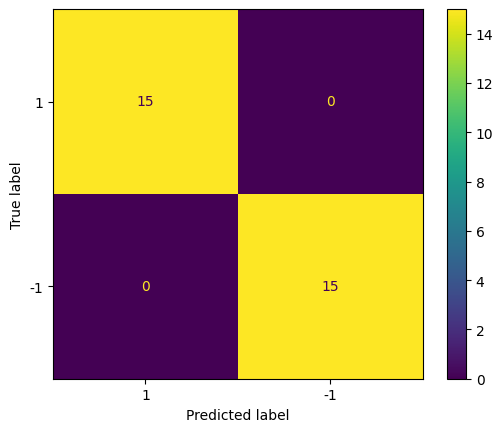

In [33]:
# Obtaining the values of the parameters W and b, to predict the classes to which the values of X_test belong

lambdas = GetLambda(X_train, y_train)
W = Get_W(X_train, y_train, lambdas)
b = Get_b(X_train, y_train, W, lambdas)

# Convert all values greater than 0 to 1, and those less than 0 to -1
y_pred = np.sign(Test(X_test, W, b))

# We create a confution matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels=[1, -1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, -1])
disp.plot()
plt.show()

----

- Subir el link de su colab a canvas
- Disfruten aprendiendo. La única forma de aprender es haciendo.
- Buena Suerte.
----